## **Aula 1 - Explorando os dados**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.shape

(133349, 11)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [43]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [45]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [46]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [47]:
df['cargo'].value_counts()

,count
cargo,
Data Scientist,17314
Software Engineer,15007
Data Engineer,14868
Data Analyst,12381
Engineer,9456
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [48]:
df['residencia'].value_counts()

,count
residencia,
US,119579
CA,5238
GB,3711
AU,517
NL,404
...,...
KW,1
AS,1
CN,1


In [49]:
df['usd'].value_counts()

,count
usd,
160000,2447
110000,2203
150000,2167
180000,1828
100000,1762
...,...
411800,1
598279,1
37069,1


In [50]:
df['empresa'].value_counts()

,count
empresa,
US,119641
CA,5239
GB,3719
AU,522
NL,404
...,...
IR,1
BS,1
IQ,1


In [52]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [53]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,95,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,77241,132563,17314,126140,119579,119641,129561


## **Aula 2 - Limpeza dos dados**

In [54]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [55]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [56]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [57]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,SE,FT,Product Manager,184500,USD,184500,US,0,US,M
59692,NaN,MI,FT,Engineer,110000,USD,110000,DE,0,DE,M
59710,NaN,EN,FT,Data Scientist,208800,USD,208800,US,0,US,M
59759,NaN,SE,FT,Software Engineer,135000,USD,135000,US,0,US,M
59789,NaN,SE,FT,Engineer,112000,USD,112000,US,0,US,M
131000,NaN,SE,FT,Machine Learning Engineer,163800,USD,163800,US,0,US,M
131006,NaN,SE,FT,Data Analytics Manager,204500,USD,204500,US,0,US,M
133054,NaN,EN,FT,Data Scientist,40000,USD,40000,JP,100,MY,L
133281,NaN,MI,FT,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,L
133317,NaN,MI,FT,Data Scientist,130000,USD,130000,US,50,US,L


In [11]:
#criando um df para simular como preencher valores nulos com a média

import numpy as np

#criando o dataframe df_salarios
df_salarios = pd.DataFrame({
    'nome': ['Joao', 'Ana', 'Marcio', 'Lino'],
    'salario': [1000, np.nan, 2000, np.nan]
})

#Criando a coluna salario_media e substituindo os valores nulos pela média
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios

,nome,salario,salario_media
0,Joao,1000.0,1000.0
1,Ana,NaN,1500.0
2,Marcio,2000.0,2000.0
3,Lino,NaN,1500.0


In [12]:
#Criando um df para testar o métedo de preencimento de valores nulos ffill (forward fill)


df_temperaturas = pd.DataFrame ({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['temperatura_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas

,Dia,Temperatura,temperatura_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [13]:
#Criando um df para testar o métedo de preencimento de valores nulos bfill (back fill)


df_temperaturas = pd.DataFrame ({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['temperatura_bfill'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,temperatura_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [14]:
#Criando df para testar o método fillna para preencher os valores nulos com um valor especifico

df_cidades = pd.DataFrame ({
    'nome': ['Ana', 'Luis', 'Vilva', 'Draf'],
    'cidade': ['Natal', np.nan, 'POA', np.nan]
})


df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não Informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,Natal,Natal
1,Luis,NaN,Não Informado
2,Vilva,POA,POA
3,Draf,NaN,Não Informado


In [58]:
#Removendo as linhas que contém valores nulos no df original e armazenando em um novo df

df_limpo = df.dropna()

In [59]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [62]:
#Alterando o tipo do dado para inteiro na coluna work_year

df_limpo = df_limpo.assign(work_year = df_limpo['ano'].astype('int64'))

In [63]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  int64  
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
 11  work_year        133339 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 13.2+ MB


## Aula 3 - Gráficos

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,work_year
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M,2025
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M,2025
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M,2025
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M,2025
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M,2025


In [67]:
df_limpo['contrato'].value_counts()

,count
contrato,
FT,132553
CT,394
PT,376
FL,16


<Axes: title={'center': 'Distribuição do nível de experiência'}, xlabel='senioridade'>

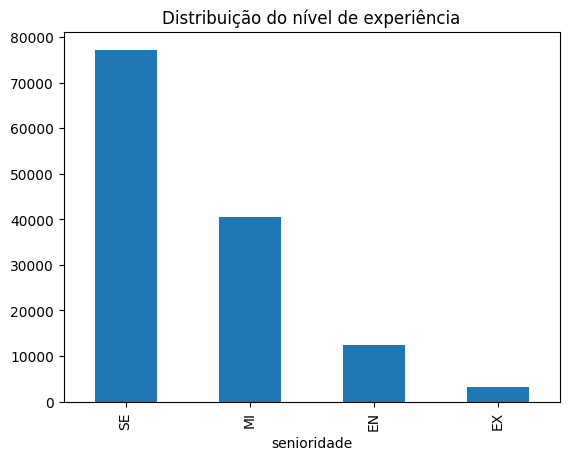

In [68]:
#Criando gráfico de barras com pandas

df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição do nível de experiência')

<Axes: xlabel='senioridade', ylabel='usd'>

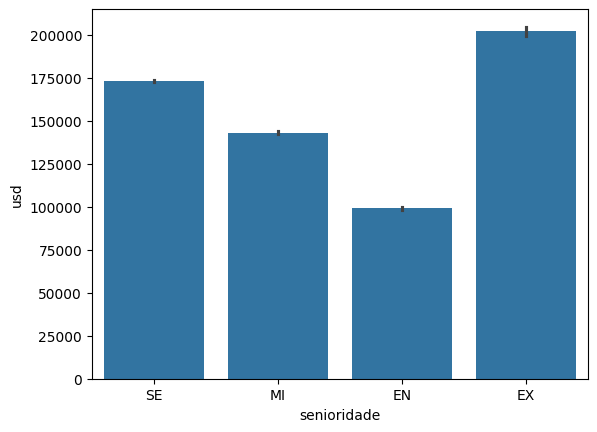

In [69]:
#Criando grafico de barras com Seaborn

sns.barplot(data=df_limpo, x= 'senioridade', y= 'usd')

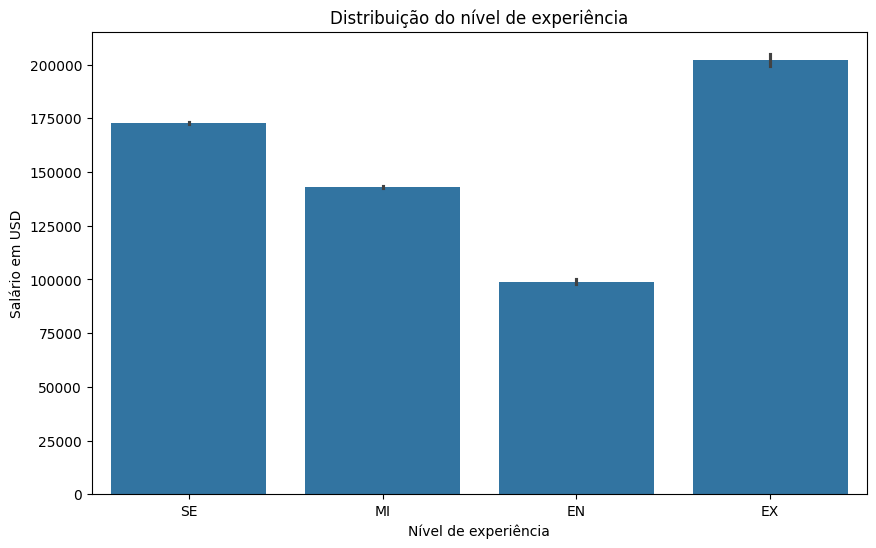

In [70]:
#Combinando Seaborn e Matplotlib para melhorar o gráfico

plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x= 'senioridade', y= 'usd')
plt.title('Distribuição do nível de experiência')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário em USD')
plt.show()

In [71]:
#Agrupando os dados para gerar o gráfico de forma ordenada

df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
EX,202027.667813
SE,172850.838301
MI,143044.845979
EN,99034.963267


In [72]:
#Criando variável para chamar no gráfico

ordenado = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

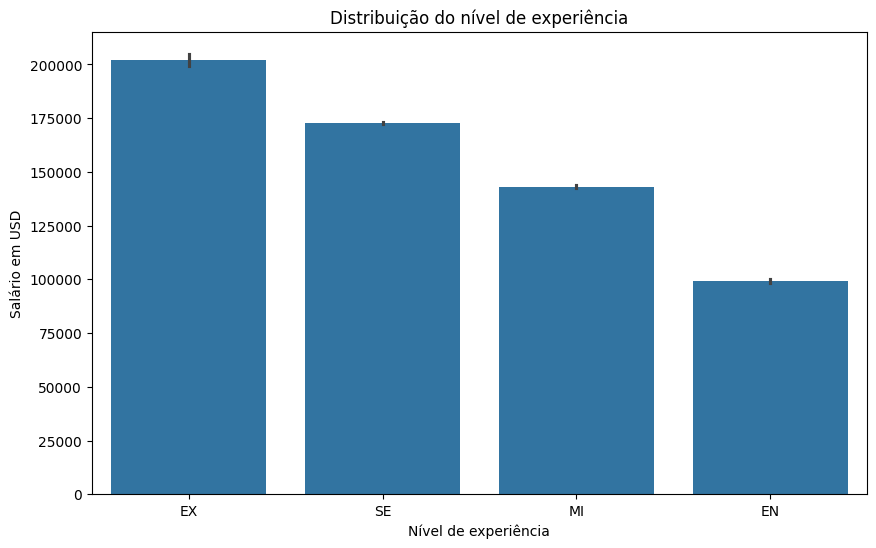

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x= 'senioridade', y= 'usd', order=ordenado)
plt.title('Distribuição do nível de experiência')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário em USD')
plt.show()

Text(0, 0.5, 'Frequência')

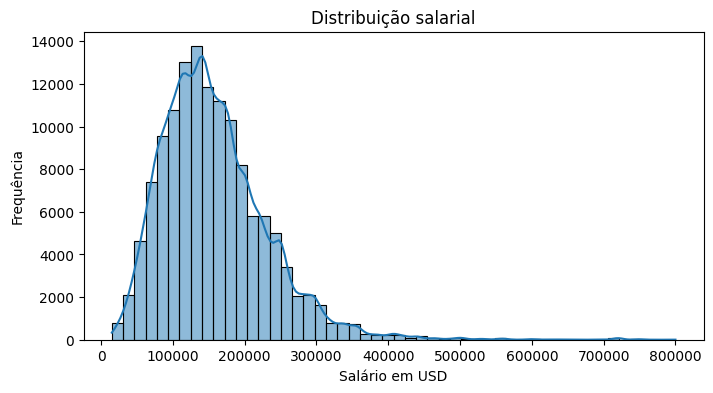

In [74]:
#Criando Histograma

plt.figure(figsize=(8,4))
sns.histplot(data=df_limpo, x='usd', bins=50, kde=True)
plt.title('Distribuição salarial')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

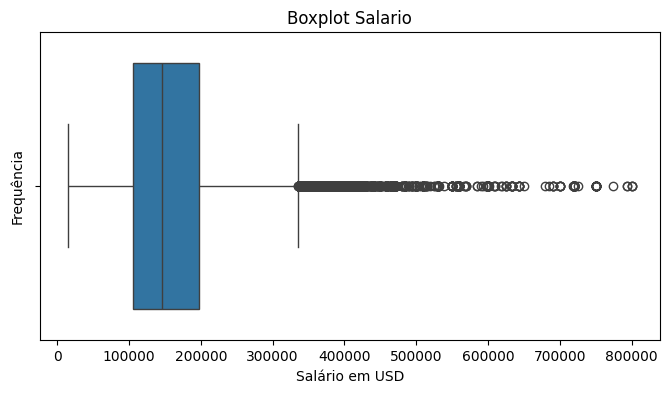

In [75]:
#Criando Boxplot

plt.figure(figsize=(8,4))
sns.boxplot(data=df_limpo, x='usd')
plt.title('Boxplot Salario')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')



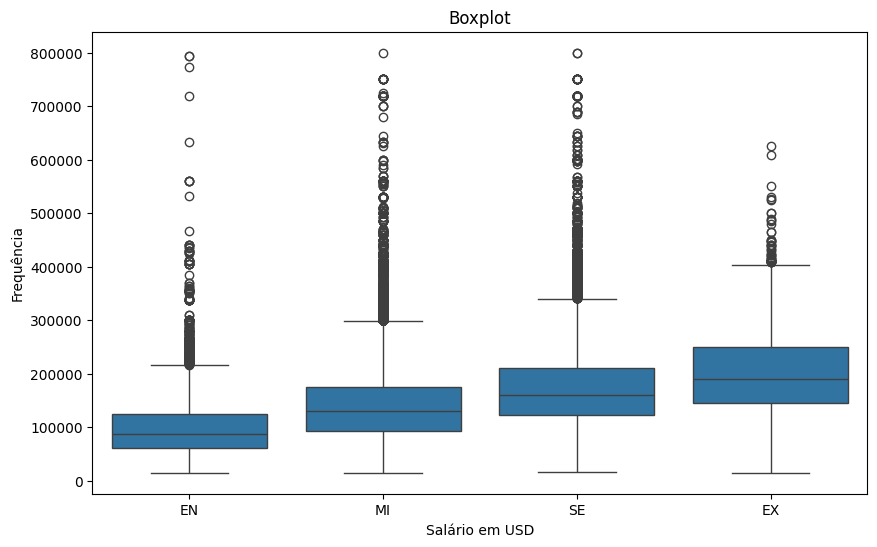

In [76]:

ordem_senioridade = ['EN', 'MI', 'SE', 'EX']


plt.figure(figsize=(10,6))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Boxplot')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

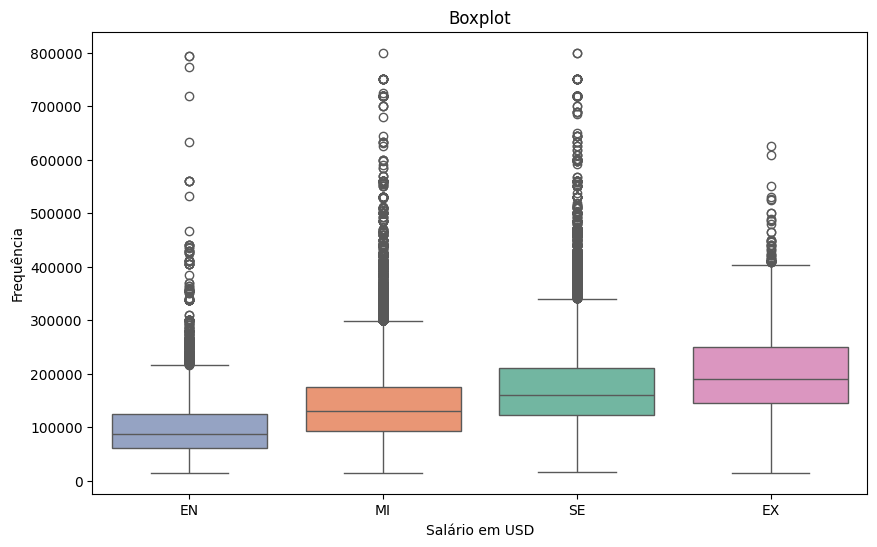

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

In [78]:
#Biblioteca para gráficos interativos

import plotly.express as px

In [79]:
experience_level_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(experience_level_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [80]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()


In [81]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.show()

In [82]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

## Aula 4 - Criação do Dashboard no Visual Code

In [83]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,work_year
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M,2025
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M,2025
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M,2025
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M,2025
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M,2025


In [84]:
pip install pycountry

In [37]:
import pycountry

In [85]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [86]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,work_year,residencia_iso3
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M,2025,USA
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M,2025,USA
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M,2025,AUS
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M,2025,AUS
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M,2025,USA


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133349 non-null  object 
 2   contrato         133349 non-null  object 
 3   cargo            133349 non-null  object 
 4   salario          133349 non-null  int64  
 5   moeda            133349 non-null  object 
 6   usd              133349 non-null  int64  
 7   residencia       133349 non-null  object 
 8   remoto           133349 non-null  int64  
 9   empresa          133349 non-null  object 
 10  tamanho_empresa  133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [88]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133349 non-null  object 
 2   contrato         133349 non-null  object 
 3   cargo            133349 non-null  object 
 4   salario          133349 non-null  int64  
 5   moeda            133349 non-null  object 
 6   usd              133349 non-null  int64  
 7   residencia       133349 non-null  object 
 8   remoto           133349 non-null  int64  
 9   empresa          133349 non-null  object 
 10  tamanho_empresa  133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [91]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)